In [1]:
#SVR ile regresyon modeli için diamond dataseti inceleyeceğiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(
    r"C:\Users\Mangtay\Desktop\DataScience\MachineLearning\Datasets\10-diamonds.csv"
)


In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Cleaning 

In [5]:
df.shape

(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
#null data yok gibi duruyor 

In [8]:
df = df.drop("Unnamed: 0",axis=1)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# burada x y z 0 olamaz bunlar uzunluk çünkü

In [13]:
len(df[df["x"] == 0])

8

In [14]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)

In [15]:
df.shape

(53920, 10)

In [16]:
#korelasyonlarına bakalım

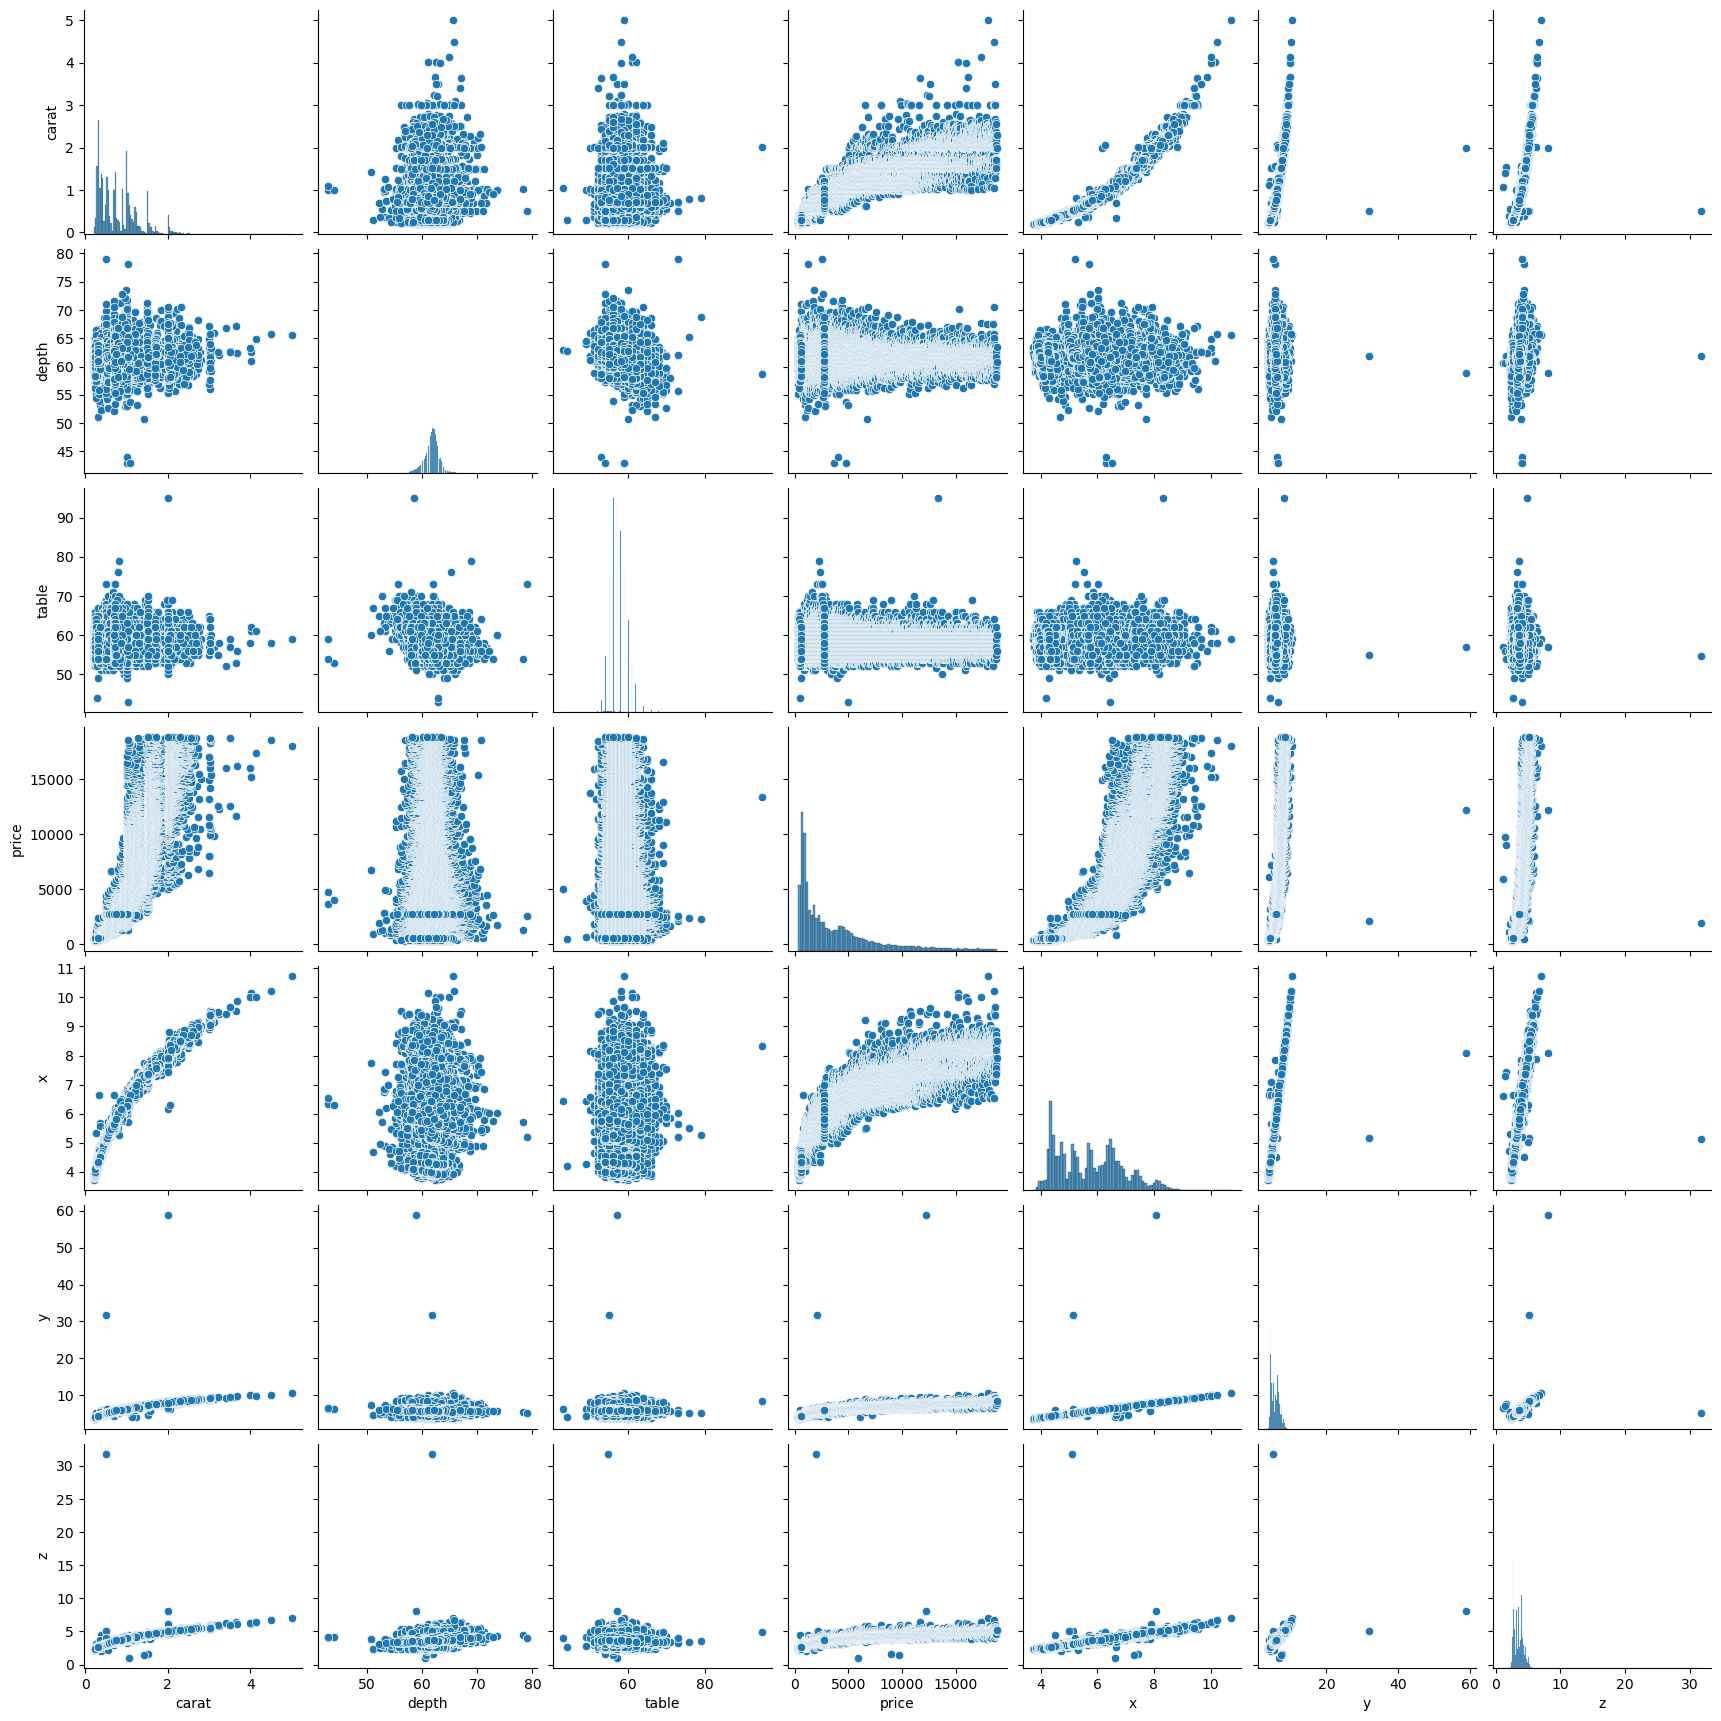

In [17]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='x', ylabel='price'>

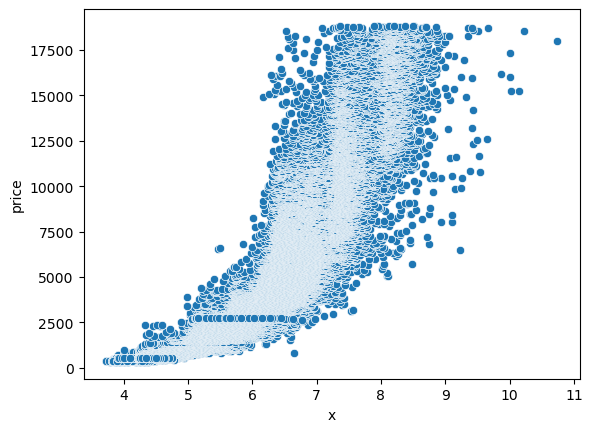

In [18]:
sns.scatterplot(x=df["x"],y=df["price"])

<Axes: xlabel='y', ylabel='price'>

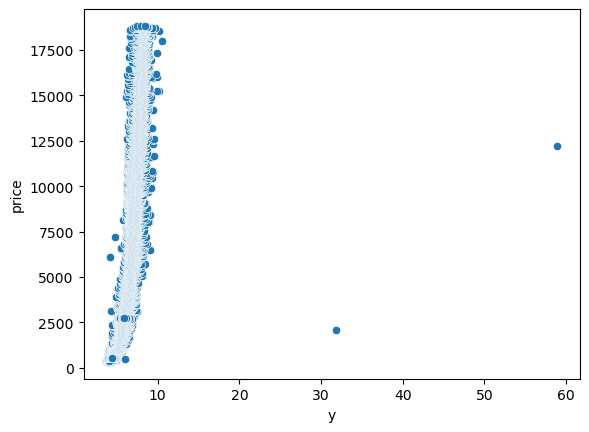

In [19]:
sns.scatterplot(x=df["y"],y=df["price"])

<Axes: xlabel='z', ylabel='price'>

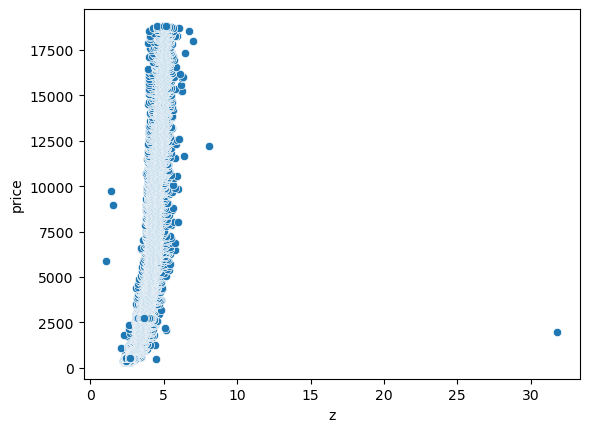

In [20]:
sns.scatterplot(x=df["z"],y=df["price"])

<Axes: xlabel='table', ylabel='price'>

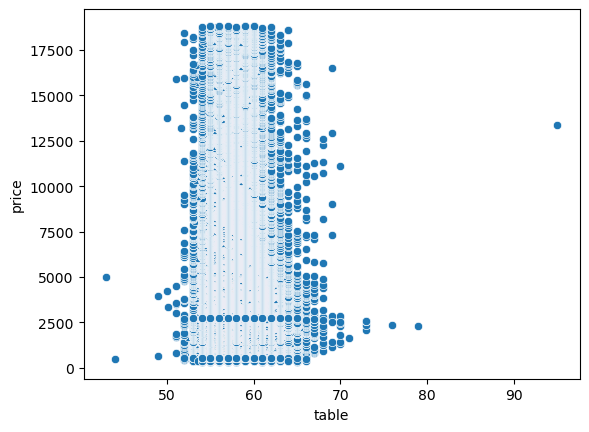

In [21]:
sns.scatterplot(x=df["table"],y=df["price"])

In [22]:
#bariz outlier var bunları datadan atmam gerekiyor 

In [23]:
#y ve z de 30 dan büyükleri çıkarabilri 

<Axes: xlabel='table', ylabel='price'>

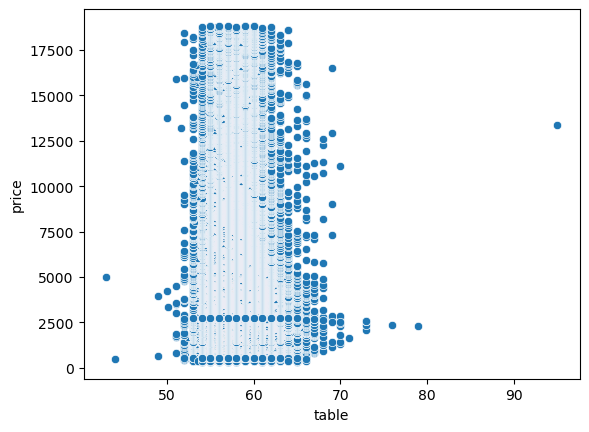

In [24]:
sns.scatterplot(x=df["table"],y=df["price"])

In [25]:
len(df[(df["depth"]<75) & (df["depth"]>45)])

53914

In [26]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

In [27]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: xlabel='y', ylabel='price'>

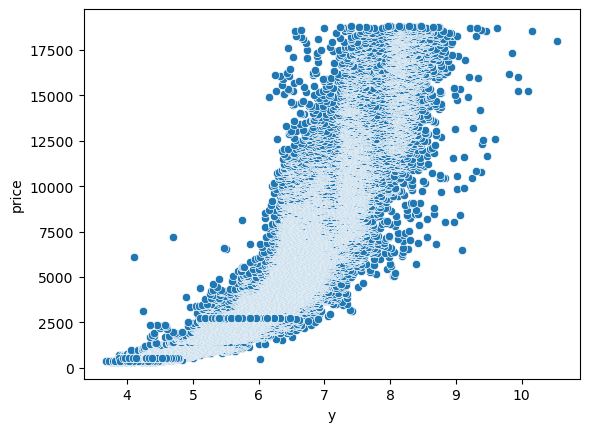

In [28]:
sns.scatterplot(x=df["y"],y=df["price"])

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
#Encoding kategorik değerler için yapılacaktır 

In [31]:
df["cut"].value_counts()

cut
Ideal        21543
Premium      13779
Very Good    12080
Good          4902
Fair          1603
Name: count, dtype: int64

In [32]:
df["color"].value_counts()

color
G    11282
E     9792
F     9536
H     8296
D     6774
I     5420
J     2807
Name: count, dtype: int64

In [33]:
df["clarity"].value_counts()

clarity
SI1     13059
VS2     12250
SI2      9184
VS1      8167
VVS2     5066
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

In [34]:
# bu datasette tüm encoding çesitleri yapılabilir

In [35]:
#label encoding ile yapılabilir

In [36]:
X = df.drop("price",axis=1)
y= df["price"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.25)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
for col in ['cut', 'color', 'clarity']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [42]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
15200,1.15,2,4,2,62.4,54.0,6.71,6.76,4.20
14632,1.11,3,1,2,61.3,58.0,6.66,6.61,4.07
19151,1.21,1,2,5,63.7,58.0,6.67,6.71,4.26
29299,0.30,2,5,5,61.5,58.0,4.28,4.31,2.64
9983,1.00,4,2,2,63.1,57.0,6.37,6.33,4.01


In [43]:
X_train["cut"].value_counts()

cut
2    16178
3    10368
4     9020
1     3666
0     1198
Name: count, dtype: int64

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40430 entries, 15200 to 7630
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40430 non-null  float64
 1   cut      40430 non-null  int64  
 2   color    40430 non-null  int64  
 3   clarity  40430 non-null  int64  
 4   depth    40430 non-null  float64
 5   table    40430 non-null  float64
 6   x        40430 non-null  float64
 7   y        40430 non-null  float64
 8   z        40430 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.1 MB


In [45]:
from sklearn.preprocessing import StandardScaler # burada eğer outlier çok fazla ise başka scale etme yöntemleirni düşünebilirz 

In [46]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Mean absolute error 864.5945387870819
R2 Score 0.8850163452280001


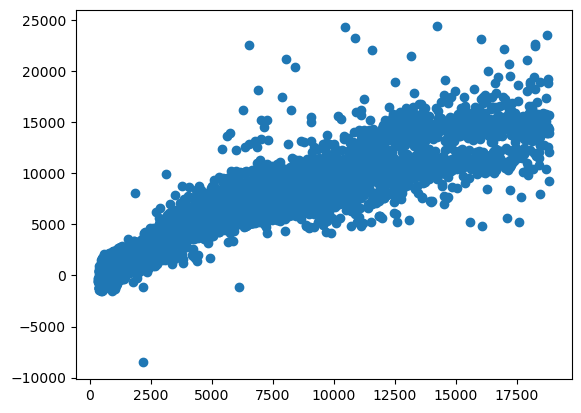

In [47]:
#first let's do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 1398.2632905135665
R2 Score 0.49245884122391603


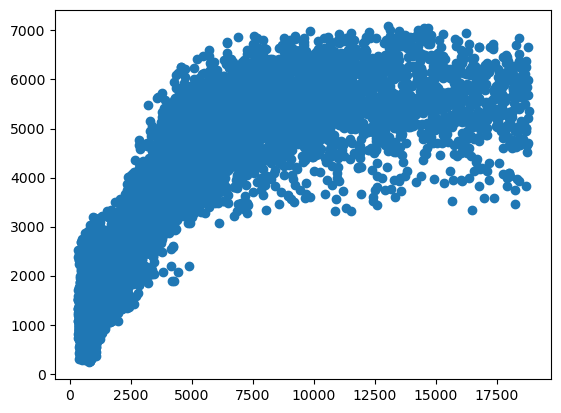

In [51]:
#second let's svm regression
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled, y_train)
y_pred=svr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
plt.show()

In [52]:
#Burada svr default olarak denedik ve çok iyi bir sonuç gelmedi tununing yaplım gridsearchcv ile

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_Grid ={
    "C": [0.1,1,10,100,1000],
    "gamma": [1,0.1,0.001],
    "kernel" : ["rbf","linear"],
}

In [56]:
grid = GridSearchCV(estimator=SVR(),param_grid=param_Grid,n_jobs=-1,verbose=3)

In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
